Read the dataset

In [1]:
import pandas as pd

df = pd.read_csv('b.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             2120 non-null   float64
 1   Y             2120 non-null   float64
 2   substrict     2120 non-null   object 
 3   time          2120 non-null   object 
 4   price         2120 non-null   object 
 5   type          2120 non-null   object 
 6   direction     2120 non-null   object 
 7   square        2120 non-null   float64
 8   price per m2  2120 non-null   object 
 9   PageUrl       2120 non-null   object 
dtypes: float64(3), object(7)
memory usage: 165.8+ KB


Clean the data

In [2]:
categoryCol=['substrict','type','direction']
for i in categoryCol:
    df[i]=df[i].astype("category")

In [3]:
df['time'] = pd.to_datetime(df['time'], format='%Y.%m.%d')

for i in range(len(df)):
    if df.loc[i,'time'] < pd.Timestamp(2011, 1, 1):
        df.loc[i,'time']=pd.Timestamp(2011, 1, 1)

In [4]:
def cleanMinus(data):
    data=str(data)
    if data.find('-')==-1:
        return data
    data=data.split('-')
    return data[0]

In [5]:
def cleanColMinus(df,colName):
    for i in range(len(df)):
        df.loc[i,colName]=cleanMinus(df.loc[i,colName])

In [6]:
minusCols=['price','price per m2']
for i in minusCols:
    cleanColMinus(df,i)
    df[i]=df[i].astype('float64')

Finish the data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   X             2120 non-null   float64       
 1   Y             2120 non-null   float64       
 2   substrict     2120 non-null   category      
 3   time          2120 non-null   datetime64[ns]
 4   price         2120 non-null   float64       
 5   type          2120 non-null   category      
 6   direction     2120 non-null   category      
 7   square        2120 non-null   float64       
 8   price per m2  2120 non-null   float64       
 9   PageUrl       2120 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(5), object(1)
memory usage: 125.7+ KB


<AxesSubplot:title={'center':'house price trend'}, xlabel='time'>

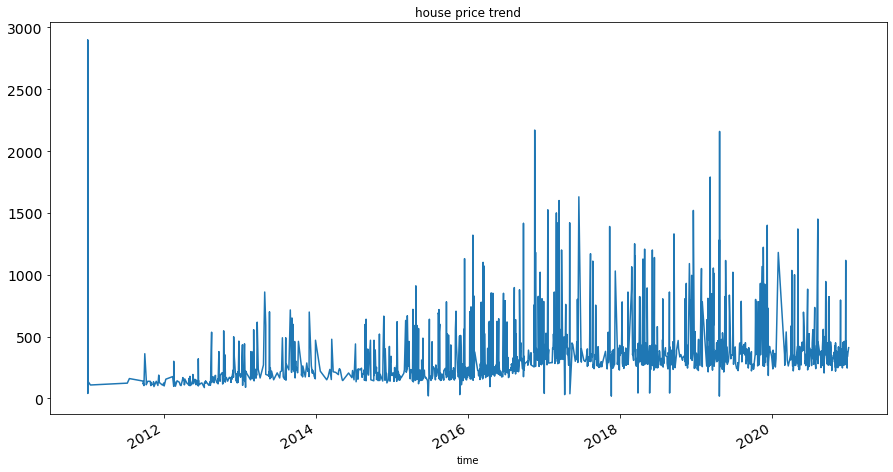

In [8]:
df.index = df['time']
df.price.plot(figsize=(15,8), title= 'house price trend', fontsize=14)

<AxesSubplot:title={'center':'average price per m2'}, xlabel='time'>

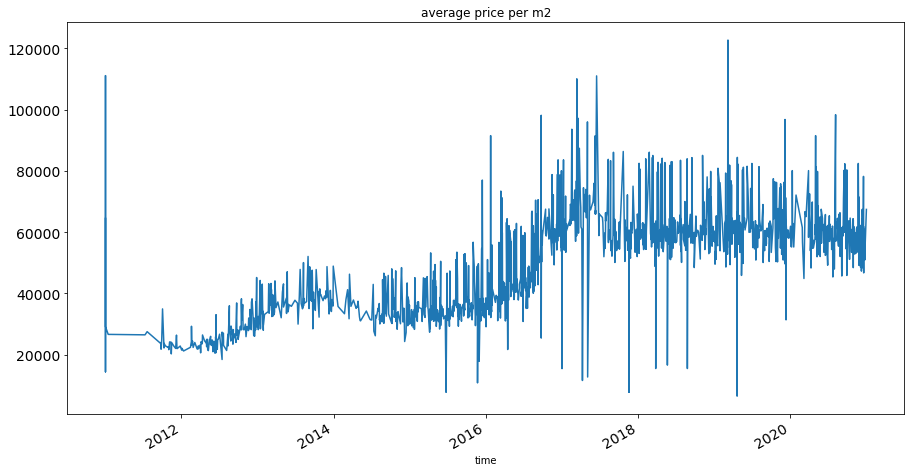

In [9]:
df['price per m2'].plot(figsize=(15,8), title= 'average price per m2', fontsize=14)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
df

,X,Y,substrict,time,price,type,direction,square,price per m2,PageUrl
time,,,,,,,,,,
2011-01-14,116.480977,39.886406,磨房北里,2011-01-14,108.0,1room1parlor1kitchen1bathroom,south north,40.54,26640.0,https://bj.ke.com/chengjiao/BJCY84121898.html
2011-07-10,116.487808,39.889853,平乐园小区,2011-07-10,123.0,1room1parlor1kitchen1bathroom,south,46.43,26491.0,https://bj.ke.com/chengjiao/BJCY84694445.html
2011-07-20,116.480720,39.884041,磨房南里,2011-07-20,160.0,2room1parlor1kitchen1bathroom,south north,58.13,27525.0,https://bj.ke.com/chengjiao/BJCY84710408.html
2011-09-23,116.481662,39.878749,松榆东里,2011-09-23,140.0,2room1parlor1kitchen1bathroom,south north,59.12,23681.0,https://bj.ke.com/chengjiao/BJCY00465546.html
2011-09-25,116.487808,39.889853,平乐园小区,2011-09-25,116.0,2room1parlor1kitchen1bathroom,south north,48.27,24031.0,https://bj.ke.com/chengjiao/BJCY00425158.html
...,...,...,...,...,...,...,...,...,...,...
2020-12-21,116.480977,39.886406,磨房北里,2020-12-21,465.0,3room1parlor1kitchen1bathroom,south west north,76.43,60840.0,https://bj.ke.com/chengjiao/101109780489.html
2020-12-27,116.481662,39.878749,松榆东里,2020-12-27,245.0,1room1parlor1kitchen1bathroom,south,40.26,60854.0,https://bj.ke.com/chengjiao/101109510275.html
2020-12-27,116.481662,39.878749,松榆东里,2020-12-27,375.0,2room1parlor1kitchen1bathroom,west,73.58,50965.0,https://bj.ke.com/chengjiao/101109442690.html


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['substrict'])
print(le.transform(df['substrict']))
list(le.classes_)

[3 0 4 ... 1 1 3]


['平乐园小区', '松榆东里', '潘道庙', '磨房北里', '磨房南里', '禧福汇', '西大望路甲27号院', '鸿坤花语墅']

In [13]:
typeEncoder=preprocessing.LabelEncoder().fit(df['type'])
directionEncoder=preprocessing.LabelEncoder().fit(df['direction'])

df['type']=typeEncoder.transform(df['type'])
df['direction']=directionEncoder.transform(df['direction'])

In [14]:
df

,X,Y,substrict,time,price,type,direction,square,price per m2,PageUrl
time,,,,,,,,,,
2011-01-14,116.480977,39.886406,磨房北里,2011-01-14,108.0,2,21,40.54,26640.0,https://bj.ke.com/chengjiao/BJCY84121898.html
2011-07-10,116.487808,39.889853,平乐园小区,2011-07-10,123.0,2,17,46.43,26491.0,https://bj.ke.com/chengjiao/BJCY84694445.html
2011-07-20,116.480720,39.884041,磨房南里,2011-07-20,160.0,5,21,58.13,27525.0,https://bj.ke.com/chengjiao/BJCY84710408.html
2011-09-23,116.481662,39.878749,松榆东里,2011-09-23,140.0,5,21,59.12,23681.0,https://bj.ke.com/chengjiao/BJCY00465546.html
2011-09-25,116.487808,39.889853,平乐园小区,2011-09-25,116.0,5,21,48.27,24031.0,https://bj.ke.com/chengjiao/BJCY00425158.html
...,...,...,...,...,...,...,...,...,...,...
2020-12-21,116.480977,39.886406,磨房北里,2020-12-21,465.0,9,24,76.43,60840.0,https://bj.ke.com/chengjiao/101109780489.html
2020-12-27,116.481662,39.878749,松榆东里,2020-12-27,245.0,2,17,40.26,60854.0,https://bj.ke.com/chengjiao/101109510275.html
2020-12-27,116.481662,39.878749,松榆东里,2020-12-27,375.0,5,27,73.58,50965.0,https://bj.ke.com/chengjiao/101109442690.html


In [15]:
clf = DecisionTreeClassifier()

X_train=df[['X','Y','time','type','direction','square']]
X_train=df[['X','Y','type','direction','square']]
y_train=df['price']
clf = clf.fit(X_train,y_train)

In [16]:
y_pred = clf.predict(X_train)

Now, we calculate the RMSE value.

In [17]:
((y_pred - y_train) ** 2).mean() ** .5

96.23287644788533

In [18]:
from sklearn.linear_model import LinearRegression
linearclf=LinearRegression()
linearclf = linearclf.fit(X_train,y_train)
linear_pred = linearclf.predict(X_train)
linearRMSE=((linear_pred - y_train) ** 2).mean() ** .5
print(linearRMSE)

119.89636219220155


In [19]:
print(y_pred)

[108. 110. 160. ... 193. 335. 410.]


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier()
knnclf = knnclf.fit(X_train,y_train)
knn_pred = knnclf.predict(X_train)
knnRMSE=((knn_pred - y_train) ** 2).mean() ** .5
print(knnRMSE)

142.1192961551057


In [33]:
from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(random_state=0, max_iter=800,alpha = 1e-4,hidden_layer_sizes = (50,50),verbose = True)
mlpclf = mlpclf.fit(X_train,y_train)
mlp_pred = mlpclf.predict(X_train)
mlpRMSE=((mlp_pred - y_train) ** 2).mean() ** .5
print(mlpRMSE)

Iteration 1, loss = 11.91893456
Iteration 2, loss = 7.84664412
Iteration 3, loss = 6.63577125
Iteration 4, loss = 6.19053513
Iteration 5, loss = 5.97239998
Iteration 6, loss = 5.82865056
Iteration 7, loss = 5.71216679
Iteration 8, loss = 5.62976549
Iteration 9, loss = 5.56318188
Iteration 10, loss = 5.51264815
Iteration 11, loss = 5.47427254
Iteration 12, loss = 5.43500696
Iteration 13, loss = 5.40355775
Iteration 14, loss = 5.37123073
Iteration 15, loss = 5.34529562
Iteration 16, loss = 5.32248232
Iteration 17, loss = 5.30017103
Iteration 18, loss = 5.27609523
Iteration 19, loss = 5.25530939
Iteration 20, loss = 5.24585544
Iteration 21, loss = 5.22639797
Iteration 22, loss = 5.20940390
Iteration 23, loss = 5.18829317
Iteration 24, loss = 5.17306586
Iteration 25, loss = 5.15573620
Iteration 26, loss = 5.14875554
Iteration 27, loss = 5.13473850
Iteration 28, loss = 5.12193386
Iteration 29, loss = 5.11328412
Iteration 30, loss = 5.09713977
Iteration 31, loss = 5.09178113
Iteration 32, lo

Iteration 255, loss = 4.21511394
Iteration 256, loss = 4.21150450
Iteration 257, loss = 4.21072121
Iteration 258, loss = 4.21204797
Iteration 259, loss = 4.19719074
Iteration 260, loss = 4.20403922
Iteration 261, loss = 4.20302295
Iteration 262, loss = 4.20111804
Iteration 263, loss = 4.19703764
Iteration 264, loss = 4.19743015
Iteration 265, loss = 4.19785791
Iteration 266, loss = 4.19625076
Iteration 267, loss = 4.19186170
Iteration 268, loss = 4.18373509
Iteration 269, loss = 4.18540601
Iteration 270, loss = 4.17519674
Iteration 271, loss = 4.18236102
Iteration 272, loss = 4.17675412
Iteration 273, loss = 4.16217634
Iteration 274, loss = 4.17467464
Iteration 275, loss = 4.16670831
Iteration 276, loss = 4.16924538
Iteration 277, loss = 4.15956847
Iteration 278, loss = 4.16317126
Iteration 279, loss = 4.16498143
Iteration 280, loss = 4.16516770
Iteration 281, loss = 4.15743386
Iteration 282, loss = 4.15625575
Iteration 283, loss = 4.15861368
Iteration 284, loss = 4.15189539
Iteration 

Iteration 505, loss = 3.79029542
Iteration 506, loss = 3.80186895
Iteration 507, loss = 3.79892271
Iteration 508, loss = 3.79273143
Iteration 509, loss = 3.79503760
Iteration 510, loss = 3.80179670
Iteration 511, loss = 3.79373745
Iteration 512, loss = 3.79921220
Iteration 513, loss = 3.80672635
Iteration 514, loss = 3.79079988
Iteration 515, loss = 3.77838925
Iteration 516, loss = 3.78740417
Iteration 517, loss = 3.79289455
Iteration 518, loss = 3.78921405
Iteration 519, loss = 3.78257317
Iteration 520, loss = 3.77293477
Iteration 521, loss = 3.78333593
Iteration 522, loss = 3.79543712
Iteration 523, loss = 3.77520039
Iteration 524, loss = 3.77341066
Iteration 525, loss = 3.76658551
Iteration 526, loss = 3.77537469
Iteration 527, loss = 3.77479835
Iteration 528, loss = 3.76482027
Iteration 529, loss = 3.77426241
Iteration 530, loss = 3.77284860
Iteration 531, loss = 3.78515830
Iteration 532, loss = 3.78654283
Iteration 533, loss = 3.78185544
Iteration 534, loss = 3.76667355
Iteration 

<AxesSubplot:title={'center':'house price trend'}, xlabel='time'>

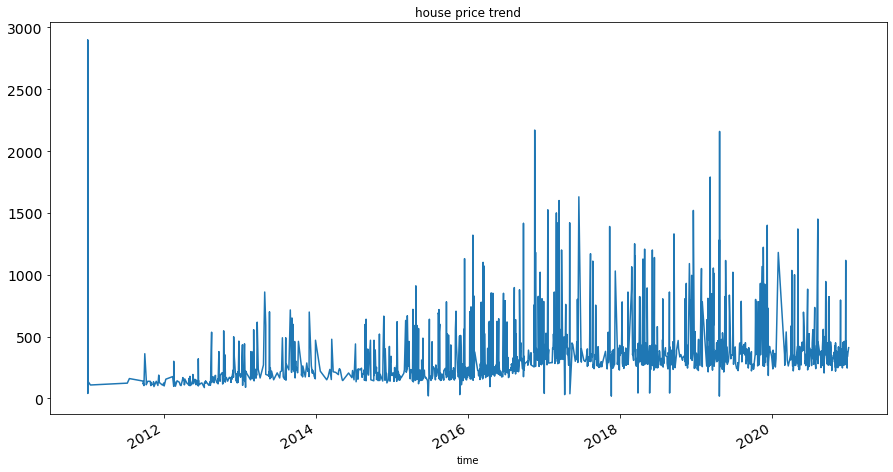

In [23]:

df.price.plot(figsize=(15,8), title= 'house price trend', fontsize=14)

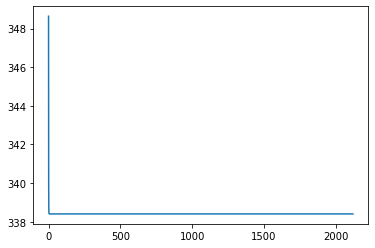

In [24]:

import matplotlib.pylab as plt
plt.plot(forecast_trend)

In [25]:

from statsmodels.tsa.arima_model import ARMA

 
if __name__ == '__main__':
    mpl.rcParams['font.sans-serif'] = 'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    data=pd.read_csv('AirPassengers.csv',header=0,names=['date','peo_num'])
    data = pd.Series(data["peo_num"].values, \
                           index=pd.DatetimeIndex(data["date"].values, freq='MS'))
    decomposition=seasonal_decompose(data,model='additive')
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    #对三部分分别进行拟合
    trend.dropna(inplace=True)
    trend_diff=trend.diff(periods=2)
    trend_diff.dropna(inplace=True)
    #分别对三部分进行拟合z
    order_trend=sm.tsa.stattools.arma_order_select_ic(trend_diff)['bic_min_order']
    #order_trend=(3,2)
    model_trend=ARMA(trend_diff,order_trend)
    result_trend=model_trend.fit()
    predict_trend=result_trend.predict()+trend.shift(2)
    forecast_trend,_,_=result_trend.forecast(11)
    forecast_trend=pd.Series(forecast_trend, index=pd.DatetimeIndex(start='1960-07-01',end='1961-05-01',freq='MS'))
    trend_predict=pd.concat([predict_trend,forecast_trend],axis=0)
    for i in range(11,0,-1):
        trend_predict.values[-i]+=trend_predict[-i-2]
    value_seasonal=[]
    for i in range(5):
        value_seasonal.append(seasonal.values[i])
    forecast_seasonal=pd.Series(value_seasonal,\
                                index=pd.DatetimeIndex(start='1961-01-01',end='1961-05-01',freq='MS'))
    seasonal_predict=pd.concat([seasonal,forecast_seasonal],axis=0)
 
    residual.dropna(inplace=True)
    order_residual=sm.tsa.stattools.arma_order_select_ic(residual)['bic_min_order']
    model_residual=ARMA(residual,order_residual)
    result_residual=model_residual.fit()
    predict_residual=result_residual.predict()
    forecast_residual,_,_=result_residual.forecast(11)
    forecast_residual=pd.Series(forecast_residual,\
                                index=pd.DatetimeIndex(start='1960-07-01',end='1961-05-01',freq='MS'))
    residual_predict=pd.concat([predict_residual,forecast_residual],axis=0)
    test_data=trend_predict+seasonal_predict+residual_predict
    print(test_data)
    data.plot(label='train_data',legend=True)
    test_data.plot(label='forecast_data',legend=True)

FileNotFoundError: [Errno 2] No such file or directory: 'AirPassengers.csv'